In [26]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

### Initialize variables

In [31]:
# initial number of coins
N_0 = 5
N_t = N_0

# epsilon, 0.05 or 0.1
e = 0.05

### Example of one state change

In [71]:
# example state change

# assign probabilities
p_change = 1/N_t
print('Probability threshold: %.2f' % p_change)

# simulate state change
p = np.random.rand()
if p <= p_change: 
    N_t += 1
print('Random number: %.2f' % p)
print('New N_t: %d' % N_t)

Probability threshold: 0.07
Random number: 0.65
New N_t: 14


# Simulation

In [77]:
# simulate process to get probability P(N_t^2 > (2+e)*t) and P(N_t^2 < (2-e)*t)

''' This function simulates model 2 and returns the probability for large deviation behavior'''
def simulate(N_0, t, M=10000, e = 0.1):
    '''
    Returns a tuple (P(N_t^2 > (2+e)*t), P(N_t^2 < (2-e)*t))
    
    N_0: initial number of coins
    t: large time t 
    M: number of simulations
    e: epsilon deviation
    '''
    
    # initialize variables
    N_t = N_0
    c_upper = 0 # num of times P(N_t^2 > (2+e)*t)
    c_lower = 0 # num of times P(N_t^2 < (2-e)*t)

    for m in range(M):
        # reset process
        N_t = N_0
    
        # simulate process for time t
        for i in range(t):
        
            # simulate state change
            p_change = 1/N_t
            p = np.random.rand()
            if p <= p_change: 
                N_t += 1
    
        # upper deviation
        if N_t**2 > t*(2+e):
            c_upper += 1
        # lower deviation
        elif N_t**2 < t*(2-e):
            c_lower += 1
            
    return (c_upper/M, c_lower/M)


In [78]:
# find probability distribution of large deviation behavior

# list of times t
times = np.arange(100, 1500, 100)
upper = np.zeros(times.shape)
lower = np.zeros(times.shape)

# get simulated probabilities for each t
N_0 = 5
for i in range(len(times)):
    t = times[i]
    p = simulate(N_0, t)
    upper[i] = p[0]
    lower[i] = p[1]


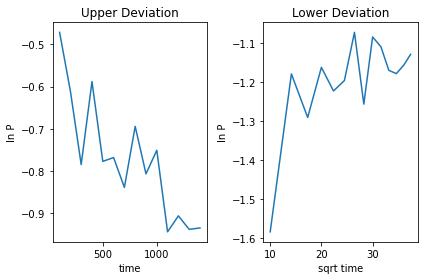

In [82]:
# graph results

# transform samples
ln_upper = np.log(upper)
ln_lower = np.log(lower)
sqrt_times = np.sqrt(times)
log_times = np.log(times)
cbrt_times = np.cbrt(times)

# making subplots
fig, ax = plt.subplots(1, 2)

# upper deviation
ax[0].plot(times, ln_upper)
ax[0].set_title("Upper Deviation")
ax[0].set_xlabel('time')
ax[0].set_ylabel('ln P')

# lower deviation
ax[1].plot(sqrt_times, ln_lower)
ax[1].set_title("Lower Deviation")
ax[1].set_xlabel('sqrt time')
ax[1].set_ylabel('ln P')

fig.tight_layout()
plt.show()